Agnieszka Wrzos

### Opis zbioru danych
Dane:
- artists.csv - informacje o zbiorze danych
- resized.zip - obrazy 50ciu różnych artystów

Źródło: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/data




## Wczytanie bibliotek

In [2]:
# Operacje matematyczne i macierzowe
import numpy as np
from numpy.random import seed

# Manipulacja i analiza danych
import pandas as pd

# Wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# Pasek postępu
from tqdm import tqdm, tqdm_notebook

# Generowanie liczb losowych
import random

# Praca z danymi w formacie JSON
import json

# Operacje na systemie plików i ścieżkach
import os
import shutil

# Podział danych na zbiory treningowe i testowe
from sklearn.model_selection import train_test_split

# TensorFlow i Keras - Tworzenie i trenowanie modeli głębokiego uczenia
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers, applications, optimizers, callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Ustawienie losowości
np.random.seed(1)
tf.random.set_seed(1)
random.seed(1)

from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Wczytanie danych i EDA

In [3]:
# Wczytanie danych
dane = pd.read_csv('data//artists.csv')

In [4]:
# Wymiary tabeli danych
dane.shape

(50, 8)

In [5]:
dane

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


Wnioski:
Dane zawierają informacje o 50ciu artystach:


Problemy:
- Niezbalansowane dane. Więcej niż 200 obrazów tylko 11 artystów.

# Model 0.5

In [6]:
# Ustawienie ścieżki do danych
data_dir = 'data/images/images'

In [7]:
# Tworzenie ImageDataGenerator do wczytywania danych i ich augmentacji
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Podział na zbiór treningowy i walidacyjny
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

In [8]:
# Wczytywanie danych treningowych
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 6779 images belonging to 50 classes.


In [9]:
# Wczytywanie danych walidacyjnych
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1667 images belonging to 50 classes.


In [10]:
# Sprawdzenie liczby klas
num_classes = len(train_generator.class_indices)
print("Liczba klas:", num_classes)


Liczba klas: 50


In [11]:
# Budowanie modelu CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)


Epoch 1/25


C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.1078 - loss: 3.6090 - val_accuracy: 0.1596 - val_loss: 3.2818
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 186s 865ms/step - accuracy: 0.1963 - loss: 3.1120 - val_accuracy: 0.2304 - val_loss: 2.9682
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 177s 823ms/step - accuracy: 0.2471 - loss: 2.8458 - val_accuracy: 0.2639 - val_loss: 2.8408
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 188s 878ms/step - accuracy: 0.2724 - loss: 2.7136 - val_accuracy: 0.2711 - val_loss: 2.7516
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 184s 857ms/step - accuracy: 0.3220 - loss: 2.5096 - val_accuracy: 0.3095 - val_loss: 2.6292
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 182s 845ms/step - accuracy: 0.3689 - loss: 2.2955 - val_accuracy: 0.3197 - val_loss: 2.5860
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 184s 852ms/step - accuracy: 0.4125 - loss: 2.1331 - val_accuracy: 0.3491 - val_loss: 2.4949
Epoch 8/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 184s 853ms/step - accuracy: 0.4417 - loss: 2.0006 

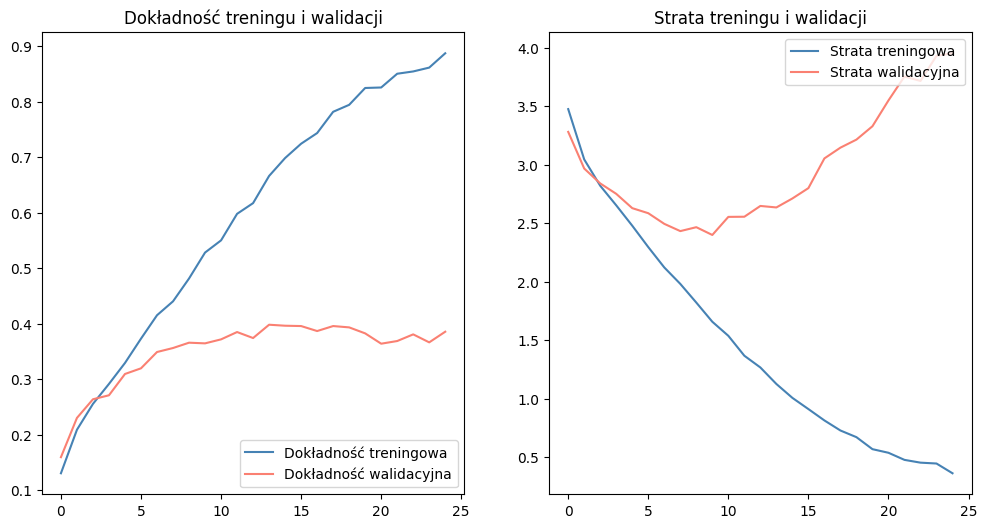

In [14]:
# Wyświetlanie wyników treningu
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, color='steelblue', label='Dokładność treningowa')  
plt.plot(epochs_range, val_acc, color='salmon', label='Dokładność walidacyjna') 
plt.legend(loc='lower right')
plt.title('Dokładność treningu i walidacji')

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, color='steelblue', label='Strata treningowa') 
plt.plot(epochs_range, val_loss, color='salmon', label='Strata walidacyjna')  
plt.legend(loc='upper right')
plt.title('Strata treningu i walidacji')

plt.show()

In [15]:
# Uzyskanie etykiet rzeczywistych
validation_labels = validation_generator.classes

# Przewidywanie na całym zbiorze walidacyjnym
validation_preds = model.predict(validation_generator)

# Uzyskanie indeksów klas dla każdej predykcji
validation_preds = np.argmax(validation_preds, axis=1)

# Generowanie raportu klasyfikacji
report = classification_report(
    validation_labels, 
    validation_preds, 
    target_names=list(validation_generator.class_indices.keys())
)
print(report)

53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 487ms/step
                           precision    recall  f1-score   support

           Albrecht_Dürer       0.01      0.02      0.02        65
            Alfred_Sisley       0.03      0.02      0.02        51
        Amedeo_Modigliani       0.05      0.05      0.05        38
            Andrei_Rublev       0.00      0.00      0.00        19
              Andy_Warhol       0.00      0.00      0.00        36
         Camille_Pissarro       0.00      0.00      0.00        18
               Caravaggio       0.00      0.00      0.00        11
             Claude_Monet       0.00      0.00      0.00        14
             Diego_Rivera       0.00      0.00      0.00        14
          Diego_Velazquez       0.00      0.00      0.00        25
              Edgar_Degas       0.08      0.09      0.08       140
            Edouard_Manet       0.00      0.00      0.00        18
             Edvard_Munch       0.00      0.00      0.00        13
                 El

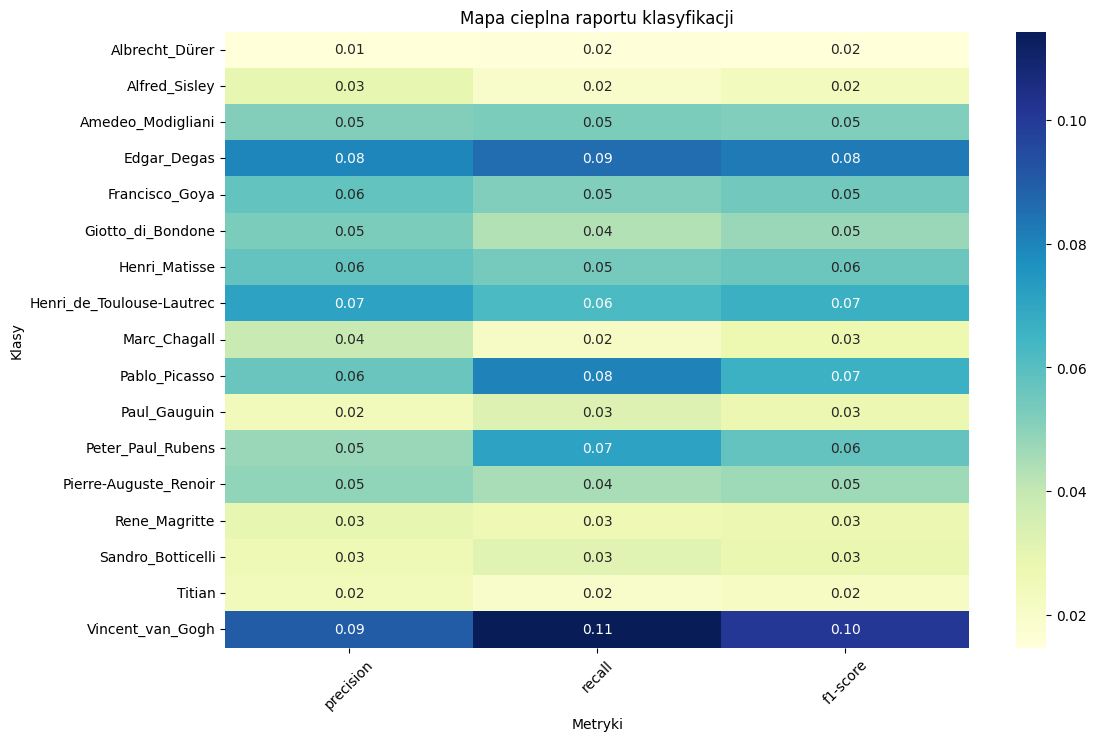

In [16]:
# Generowanie raportu klasyfikacji z output_dict=True
report2 = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True)

# Przygotowanie danych do heatmapy
report_df = pd.DataFrame(report2).transpose()

# Usunięcie wierszy 'accuracy', 'macro avg' i 'weighted avg'
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Filtrowanie wierszy z zerowymi wartościami w kolumnach precision, recall lub f1-score
report_df = report_df[(report_df[['precision', 'recall', 'f1-score']] > 0).any(axis=1)]

# Wizualizacja heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mapa cieplna raportu klasyfikacji')
plt.xlabel('Metryki')
plt.ylabel('Klasy')
plt.xticks(rotation=45)
plt.show()

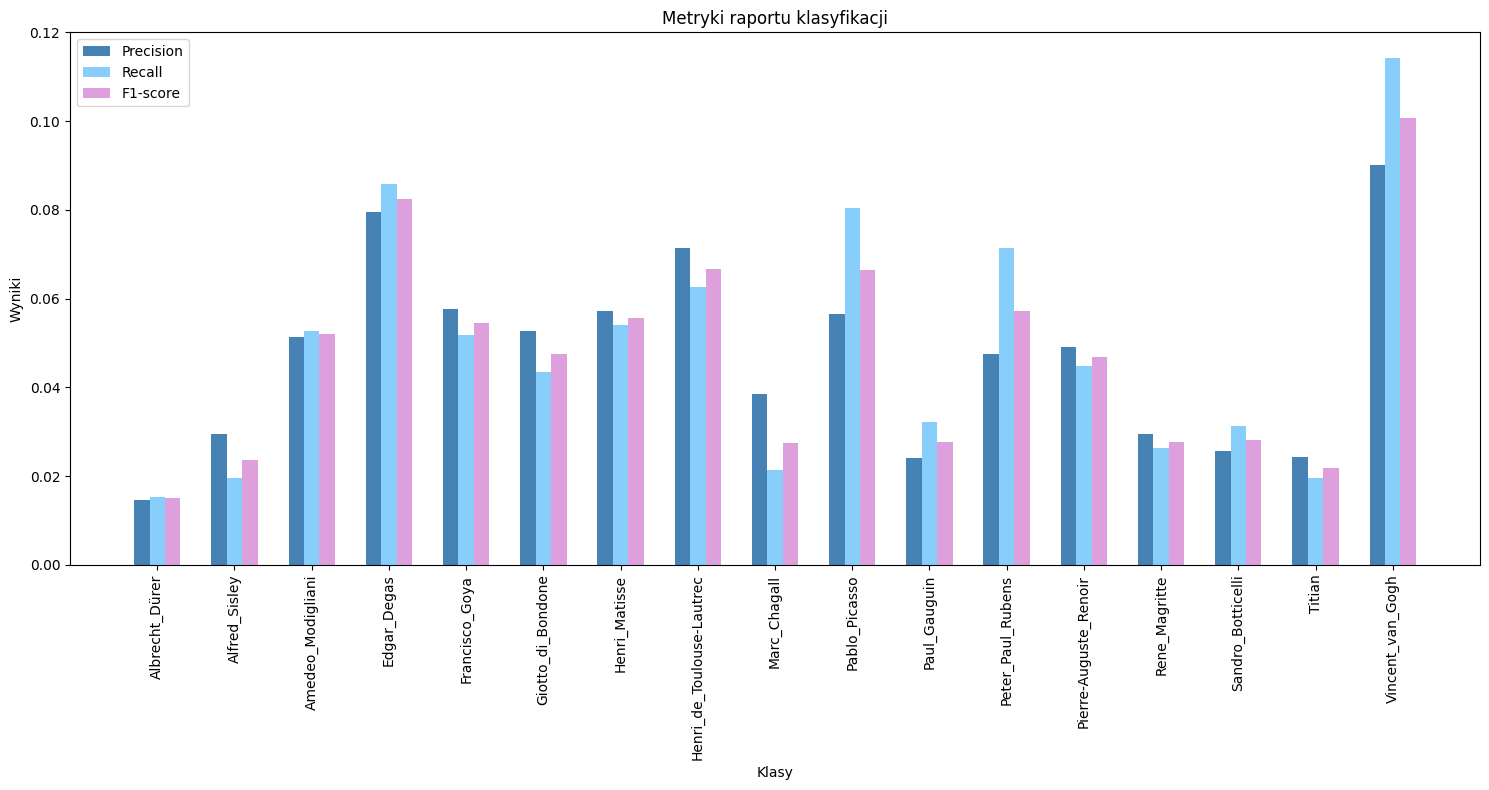

In [17]:
# Obliczanie raportu klasyfikacji
report = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True)

# Przygotowanie danych do wykresu
classes = list(report.keys())[:-3]  # Wyklucza 'accuracy', 'macro avg', 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]
f1_score = [report[class_]['f1-score'] for class_ in classes]

# Filtrowanie klas z zerowymi wartościami
non_zero_indices = [i for i, p in enumerate(precision) if p > 0 or recall[i] > 0 or f1_score[i] > 0]
filtered_classes = [classes[i] for i in non_zero_indices]
filtered_precision = [precision[i] for i in non_zero_indices]
filtered_recall = [recall[i] for i in non_zero_indices]
filtered_f1_score = [f1_score[i] for i in non_zero_indices]

x = np.arange(len(filtered_classes))  # Lokalizacja klas na osi X
width = 0.2  # Szerokość słupków

fig, ax = plt.subplots(figsize=(15, 8))

# Kolory dla wskaźników
color_precision = '#4682B4'  # Steel Blue
color_recall = '#87CEFA'  # Light Sky Blue
color_f1 = 'plum'  # Fioletowy

bars1 = ax.bar(x - width, filtered_precision, width, label='Precision', color=color_precision)
bars2 = ax.bar(x, filtered_recall, width, label='Recall', color=color_recall)
bars3 = ax.bar(x + width, filtered_f1_score, width, label='F1-score', color=color_f1)

# Dodanie etykiet
ax.set_xlabel('Klasy')
ax.set_ylabel('Wyniki')
ax.set_title('Metryki raportu klasyfikacji')
ax.set_xticks(x)
ax.set_xticklabels(filtered_classes, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
